In [1]:
!pip install keras
!pip install tensorflow
!pip install theano
!pip install Adafruit_IO
!pip install requests

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from Adafruit_IO import Client, Feed, RequestError
from tabulate import tabulate
from time import sleep

In [3]:
df = pd.read_csv('SmartAgriculturePython1.csv')

In [4]:
df.head(10)
#df = df.drop(['Length'], axis=1)

,date,temperature,humidity,soilMoisture,Length,Growth
0,"Wednesday,-December-20-2023-09:50:07",28.0,86,37.14,12.75,0.00
1,"Wednesday,-December-20-2023-10:50:07",29.3,85,39.07,12.76,0.01
2,"Wednesday,-December-20-2023-11:50:07",30.3,87,38.22,12.77,0.01
3,"Wednesday,-December-20-2023-12:50:06",60.1,30,40.00,12.78,0.01
4,"Wednesday,-December-20-2023-13:50:06",45.8,67,39.98,12.79,0.01
5,"Wednesday,-December-20-2023-14:50:06",44.9,66,39.41,12.80,0.01
6,"Wednesday,-December-20-2023-15:50:06",46.2,66,42.17,12.95,0.15
7,"Wednesday,-December-20-2023-16:50:06",41.1,72,39.17,13.10,0.15
8,"Wednesday,-December-20-2023-17:50:06",41.1,75,37.90,13.25,0.15
9,"Wednesday,-December-20-2023-18:50:06",33.3,86,42.05,13.40,0.15


In [5]:
df

,date,temperature,humidity,soilMoisture,Length,Growth
0,"Wednesday,-December-20-2023-09:50:07",28.0,86,37.14,12.75,0.00
1,"Wednesday,-December-20-2023-10:50:07",29.3,85,39.07,12.76,0.01
2,"Wednesday,-December-20-2023-11:50:07",30.3,87,38.22,12.77,0.01
3,"Wednesday,-December-20-2023-12:50:06",60.1,30,40.00,12.78,0.01
4,"Wednesday,-December-20-2023-13:50:06",45.8,67,39.98,12.79,0.01
...,...,...,...,...,...,...
297,"Tuesday,-December-26-2023-11:11:31",41.6,55,34.53,152.20,1.20
298,"Tuesday,-December-26-2023-12:11:31",48.2,46,33.33,153.40,1.20
299,"Tuesday,-December-26-2023-13:11:31",48.3,49,31.40,154.60,1.20
300,"Tuesday,-December-26-2023-14:11:30",60.1,27,34.63,155.80,1.20


In [6]:
# Features: temperature, humidity, soil moisture
features = df[['temperature', 'humidity', 'soilMoisture']]

# Target: length
target = df['Growth']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
model1 = RandomForestRegressor(n_estimators=146, random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=146, random_state=42)

In [24]:
y1_pred = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y1_pred)
mae1 = mean_absolute_error(y_test, y1_pred)
rmse1 = np.sqrt(mse1)
print('Mean Squared Error 1:', mse1)
print('Mean Absoluted Error 1:', mae1)
print('Root Mean Squared Error 1:', rmse1)
model1.score(X_test, y_test)

Mean Squared Error 1: 0.09267455480192904
Mean Absoluted Error 1: 0.2422009623427429
Root Mean Squared Error 1: 0.30442495758713517


0.4052847495401315

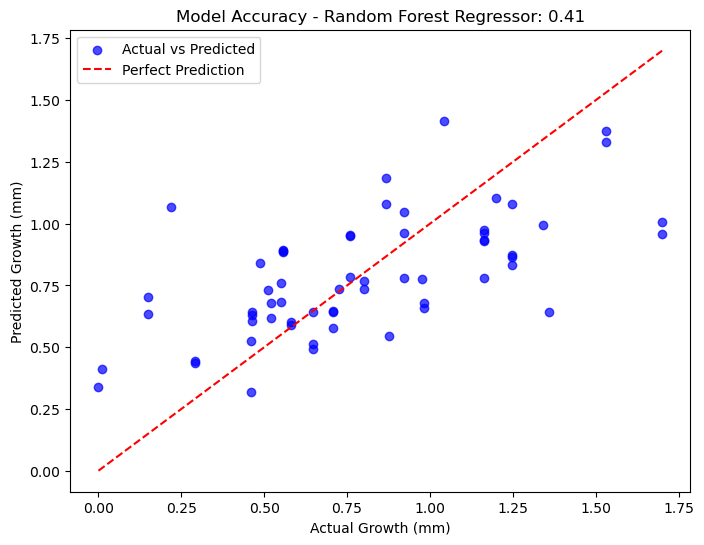

In [35]:
y1_pred = model1.predict(X_test)

# Calculate the R-squared score (you can use other regression metrics as well)
r2 = r2_score(y_test, y1_pred)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y1_pred, alpha=0.7, color='b', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.title(f'Model Accuracy - Random Forest Regressor: {r2:.2f}')
plt.xlabel('Actual Growth (mm)')
plt.ylabel('Predicted Growth (mm)')
plt.legend()
plt.show()

In [25]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
y2_pred = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y2_pred)
mae2 = mean_absolute_error(y_test, y2_pred)
rmse2 = np.sqrt(mse2)
print('Mean Squared Error 2:', mse2)
print('Mean Absoluted Error 2:', mae2)
print('Root Mean Squared Error 2:', rmse2)
model2.score(X_test, y_test)

Mean Squared Error 2: 0.11903324565955031
Mean Absoluted Error 2: 0.2581811113114753
Root Mean Squared Error 2: 0.3450119500242714


0.23613459318180618

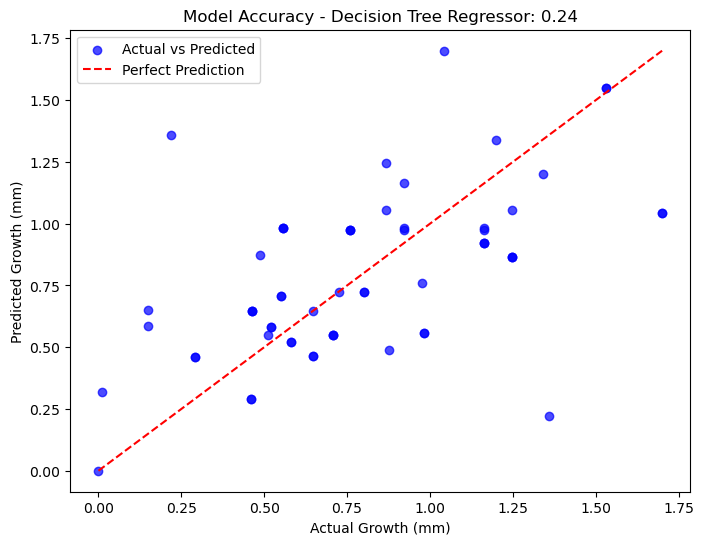

In [27]:
y2_pred = model2.predict(X_test)

# Calculate the R-squared score (you can use other regression metrics as well)
r2a = r2_score(y_test, y2_pred)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y2_pred, alpha=0.7, color='b', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.title(f'Model Accuracy - Decision Tree Regressor: {r2a:.2f}')
plt.xlabel('Actual Growth (mm)')
plt.ylabel('Predicted Growth (mm)')
plt.legend()
plt.show()

In [59]:
model3 = KNeighborsRegressor(n_neighbors=8)
model3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [60]:
y3_pred = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y3_pred)
mae3 = mean_absolute_error(y_test, y3_pred)
rmse3 = np.sqrt(mse3)
print('Mean Squared Error 3:', mse3)
print('Mean Absoluted Error 3:', mae3)
print('Root Mean Squared Error 3:', rmse3)
model3.score(X_test, y_test)

Mean Squared Error 3: 0.11261157155995881
Mean Absoluted Error 3: 0.26379285471311475
Root Mean Squared Error 3: 0.3355764764699081


0.27734404413274527

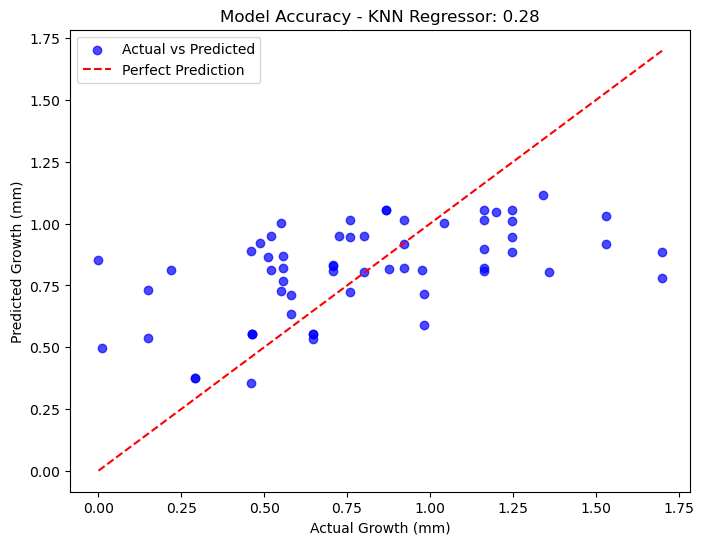

In [53]:
y3_pred = model3.predict(X_test)

# Calculate the R-squared score (you can use other regression metrics as well)
r2b = r2_score(y_test, y3_pred)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y3_pred, alpha=0.7, color='b', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.title(f'Model Accuracy - KNN Regressor: {r2b:.2f}')
plt.xlabel('Actual Growth (mm)')
plt.ylabel('Predicted Growth (mm)')
plt.legend()
plt.show()

In [54]:
model4 = SVR(kernel='linear')
model4.fit(X_train, y_train)

SVR(kernel='linear')

In [55]:
y4_pred = model4.predict(X_test)
mse4 = mean_squared_error(y_test, y4_pred)
mae4 = mean_absolute_error(y_test, y4_pred)
rmse4 = np.sqrt(mse4)
print('Mean Squared Error 3:', mse4)
print('Mean Absoluted Error 3:', mae4)
print('Root Mean Squared Error 3:', rmse4)
model4.score(X_test, y_test)

Mean Squared Error 3: 0.1327992924399491
Mean Absoluted Error 3: 0.2950456667356641
Root Mean Squared Error 3: 0.3644163723544115


0.14779450914962788

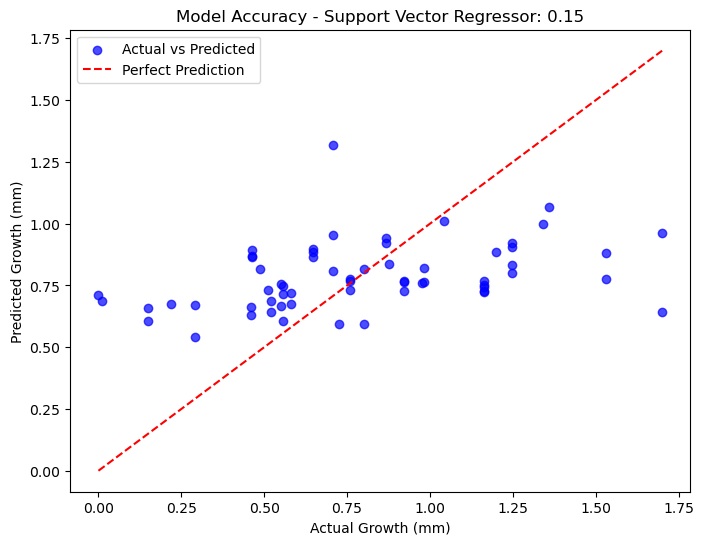

In [56]:
y4_pred = model4.predict(X_test)

# Calculate the R-squared score (you can use other regression metrics as well)
r2c = r2_score(y_test, y4_pred)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y4_pred, alpha=0.7, color='b', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.title(f'Model Accuracy - Support Vector Regressor: {r2c:.2f}')
plt.xlabel('Actual Growth (mm)')
plt.ylabel('Predicted Growth (mm)')
plt.legend()
plt.show()

In [13]:
# Replace with your Adafruit IO key.
ADAFRUIT_IO_KEY = 'aio_idjA45AXti3ZaHg7WfqWNnycNDmj'

# Replace with your Adafruit IO username.
ADAFRUIT_IO_USERNAME = 'Asyful'

# Create an instance of the Adafruit IO client.
aio = Client(ADAFRUIT_IO_USERNAME, ADAFRUIT_IO_KEY)

In [14]:
# Define the feed names.
soil_feed = 'soil'
temperature_feed = 'temperature'
humidity_feed = 'humidity'
length_feed = 'length'

In [ ]:
while True:
    soil_data = aio.receive(soil_feed)
    temperature_data = aio.receive(temperature_feed)
    humidity_data = aio.receive(humidity_feed)
    length_data = aio.receive(length_feed)

    new_data = pd.DataFrame({
        'temperature': temperature_data.value,
        'humidity': humidity_data.value,
        'soilMoisture': soil_data.value
        }, index=[0]) # provide an index

    predicted_growth1 = model1.predict(new_data)

    # get the current timestamp
    current_timestamp = time.localtime()

    # format the data into two decimal places
    formatted_temperature = format(float(temperature_data.value), '.2f')
    formatted_humidity = format(float(humidity_data.value), '.2f')
    formatted_soil = format(float(soil_data.value), '.2f')
    formatted_length = format(float(length_data.value), '.2f')
    formatted_growth = format(float(predicted_growth1[0]), '.2f')

    # format the current timestamp to the desired format
    formatted_timestamp = time.strftime('%A, %B %d, %Y, %H:%M:%S', current_timestamp)

    growth_value = float(formatted_growth)
    length_value = float(formatted_length)

    # accumulate the new 'growth' value as 'length'
    new_length_value = growth_value + length_value

    # send the updated 'length' value to the feed
    aio.send('length', new_length_value)
    aio.send('veg1', formatted_growth)

    print(formatted_temperature)
    print(formatted_humidity)
    print(formatted_soil)
    print(formatted_growth)
    print(new_length_value)
    print(formatted_timestamp)

    last_row = df.iloc[-1]

    # create a new row of data with the desired values
    new_row = {'date': formatted_timestamp,'temperature': formatted_temperature, 'humidity': formatted_humidity, 'soilMoisture': formatted_soil,  'Length': new_length_value,'Growth': formatted_growth}

    # convert the new row to a dataframe
    new_row_df = pd.DataFrame([new_row])

    # concatenate the new row dataframe to the data dataframe
    df = pd.concat([df, new_row_df], ignore_index=True)

    df.to_csv('SmartAgriculturePython1.csv', index=False)

    temperature = 0
    humidity = 0
    soilMoisture = 0

    # Define the function to check the condition and send text
    # Define the function to check the condition and send text
    def check_conditions_and_send_text():
        global temperature, humidity, soilMoisture

        temperature = float(temperature)
        humidity = float(humidity)
        soilMoisture = float(soilMoisture)

        if temperature > 50 and soilMoisture < 35:
            aio.send('text', 'HIGH Temperature \n LOW Soil Moisture! \n Turn On Water Pump ')
        elif temperature > 50 and soilMoisture > 35:
            aio.send('text', 'HIGH Temperature \n STAY ALERT!')
        elif temperature < 25 and soilMoisture < 35:
            aio.send('text', 'LOW Temperature!! \n LOW Soil Moisture!! \n Turn On Water Pump')
        elif temperature < 25 and soilMoisture > 35:
            aio.send('text', 'LOW Temperature!!')
        elif soilMoisture < 35:
            aio.send('text', 'Low Moisture \n Turn On Water Pump')
        elif humidity < 40:
            aio.send('text', 'Low Humidity')
        else:
            aio.send('text', 'Normal Parameters')

    def get_sensor_values():
        global temperature, humidity, soilMoisture

        temperature = temperature_data.value
        humidity = humidity_data.value
        soilMoisture = soil_data.value
    
    # calculate harvesting time
    def calculate_harvesting_time(new_length_value):
        # adjust this value according to your setup
        avg_per_hour = 0.8

        current_length = float(new_length_value)
        remaining_length = 140 - current_length
        harvesting_time = remaining_length / avg_per_hour

        return harvesting_time

    harvesting_time = calculate_harvesting_time(new_length_value)
    aio.send('harvest', '{:.2f} hours'.format(harvesting_time))

    get_sensor_values()
    check_conditions_and_send_text()
    time.sleep(3600)

In [21]:
aio.send('temperature',26.2)
aio.send('humidity',84)
aio.send('soil',25.25)

Data(created_epoch=1704704674, created_at='2024-01-08T09:04:34Z', updated_at=None, value='25.25', completed_at=None, feed_id=2540942, expiration='2024-02-07T09:04:34Z', position=None, id='0FG49JMYVQYAG69SEHMFV99ABH', lat=None, lon=None, ele=None)

In [34]:
aio.send('text', 'Low Humidity')

Data(created_epoch=1704349482, created_at='2024-01-04T06:24:42Z', updated_at=None, value='Low Humidity', completed_at=None, feed_id=2704759, expiration='2024-02-03T06:24:42Z', position=None, id='0FG0ZQ8W0ZF5AVHAFTY74DAQHE', lat=None, lon=None, ele=None)

In [22]:
soil_data = aio.receive(soil_feed)
temperature_data = aio.receive(temperature_feed)
humidity_data = aio.receive(humidity_feed)
length_data = aio.receive(length_feed)

new_data = pd.DataFrame({
    'temperature': temperature_data.value,
    'humidity': humidity_data.value,
    'soilMoisture': soil_data.value
    }, index=[0]) # provide an index

predicted_growth1 = model1.predict(new_data)

# get the current timestamp
current_timestamp = time.localtime()

# format the data into two decimal places
formatted_temperature = format(float(temperature_data.value), '.2f')
formatted_humidity = format(float(humidity_data.value), '.2f')
formatted_soil = format(float(soil_data.value), '.2f')
formatted_length = format(float(length_data.value), '.2f')
formatted_growth = format(float(predicted_growth1[0]), '.2f')

# format the current timestamp to the desired format
formatted_timestamp = time.strftime('%A, %B %d, %Y, %H:%M:%S', current_timestamp)

growth_value = float(formatted_growth)
length_value = float(formatted_length)

# accumulate the new 'growth' value as 'length'
new_length_value = growth_value + length_value

# send the updated 'length' value to the feed
aio.send('length', new_length_value)
aio.send('veg1', formatted_growth)

print(formatted_temperature)
print(formatted_humidity)
print(formatted_soil)
print(formatted_growth)
print(new_length_value)
print(formatted_timestamp)

26.20
84.00
25.25
0.77
58.290000000000006
Monday, January 08, 2024, 17:06:51
